In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
  
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
url = "/content/drive/My Drive/da_project/football_data.csv"
data = pd.read_csv(url)
data.describe

<bound method NDFrame.describe of        Unnamed: 0      ID  ... GKReflexes  Release Clause
0               0  158023  ...        8.0         €226.5M
1               1   20801  ...       11.0         €127.1M
2               2  190871  ...       11.0         €228.1M
3               3  193080  ...       94.0         €138.6M
4               4  192985  ...       13.0         €196.4M
...           ...     ...  ...        ...             ...
18202       18202  238813  ...        9.0           €143K
18203       18203  243165  ...       12.0           €113K
18204       18204  241638  ...       13.0           €165K
18205       18205  246268  ...        9.0           €143K
18206       18206  246269  ...        9.0           €165K

[18207 rows x 89 columns]>

In [3]:
data.head()

Unnamed: 0      ID  ... GKReflexes  Release Clause
0           0  158023  ...        8.0         €226.5M
1           1   20801  ...       11.0         €127.1M
2           2  190871  ...       11.0         €228.1M
3           3  193080  ...       94.0         €138.6M
4           4  192985  ...       13.0         €196.4M

[5 rows x 89 columns]

In [ ]:
print(data.info())

In [3]:
data1 = data
data1 = data1.drop(['Unnamed: 0','ID','Photo','Position','Work Rate','Skill Moves','International Reputation','Weak Foot','Nationality','Flag','Club','Preferred Foot','Joined','Height','Contract Valid Until','Release Clause','Weight','Club Logo','Body Type','Real Face','Age','Value','Wage','Special','Jersey Number','Loaned From'],axis=1)
data1

Name  Overall  ...  GKPositioning GKReflexes
0                L. Messi       94  ...           14.0        8.0
1       Cristiano Ronaldo       94  ...           14.0       11.0
2               Neymar Jr       92  ...           15.0       11.0
3                  De Gea       91  ...           88.0       94.0
4            K. De Bruyne       91  ...           10.0       13.0
...                   ...      ...  ...            ...        ...
18202        J. Lundstram       47  ...            8.0        9.0
18203  N. Christoffersson       47  ...            5.0       12.0
18204           B. Worman       47  ...            6.0       13.0
18205      D. Walker-Rice       47  ...            8.0        9.0
18206           G. Nugent       46  ...           12.0        9.0

[18207 rows x 63 columns]

In [4]:
def updatePosRate(x1):
  if(x1 == None or x1 == 0 ): 
    return 0
  if( type(x1) == float):
    return int(x1)  
  # print(x1)
  # x =''
  x=x1
  x = x.split('+')
  # print(x)
  x = int(x[0]) + int(x[1])
  return int(x)

In [88]:
tq = data1
tq = tq.fillna(0)
for i in range(3,63):
  tq.iloc[:,i] = tq.iloc[:,i].apply(lambda x: updatePosRate(x))
tq

Name  Overall  ...  GKPositioning  GKReflexes
0                L. Messi       94  ...             14           8
1       Cristiano Ronaldo       94  ...             14          11
2               Neymar Jr       92  ...             15          11
3                  De Gea       91  ...             88          94
4            K. De Bruyne       91  ...             10          13
...                   ...      ...  ...            ...         ...
18202        J. Lundstram       47  ...              8           9
18203  N. Christoffersson       47  ...              5          12
18204           B. Worman       47  ...              6          13
18205      D. Walker-Rice       47  ...              8           9
18206           G. Nugent       46  ...             12           9

[18207 rows x 63 columns]

In [53]:
# tq = tq.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
      #  'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'],axis=1)

In [112]:
print(tq.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 63 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             18207 non-null  object
 1   Overall          18207 non-null  int64 
 2   Potential        18207 non-null  int64 
 3   LS               18207 non-null  int64 
 4   ST               18207 non-null  int64 
 5   RS               18207 non-null  int64 
 6   LW               18207 non-null  int64 
 7   LF               18207 non-null  int64 
 8   CF               18207 non-null  int64 
 9   RF               18207 non-null  int64 
 10  RW               18207 non-null  int64 
 11  LAM              18207 non-null  int64 
 12  CAM              18207 non-null  int64 
 13  RAM              18207 non-null  int64 
 14  LM               18207 non-null  int64 
 15  LCM              18207 non-null  int64 
 16  CM               18207 non-null  int64 
 17  RCM              18207 non-null

In [242]:
NumData = tq

In [244]:
# NumData = tq
PlayersName = NumData['Name'].tolist()
PlayersName
NumData = NumData.drop(['Name'],axis=1)


In [243]:
NumData = NumData[NumData.Overall > 86]

In [ ]:
NumData

***DBSCAN Clustering***

In [245]:
from sklearn import preprocessing
x = NumData.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [246]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced =  pd.DataFrame(pca.fit_transform(X_norm))

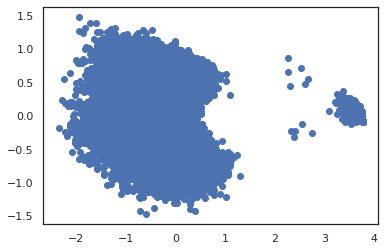

In [173]:
X = reduced
plt.scatter(X[:,0], X[:,1])

In [ ]:
Trying out DBscan on different eps and min_samples

In [163]:
m = DBSCAN(eps=0.1, min_samples=10)
m.fit_predict(X)
clusters = m.labels_


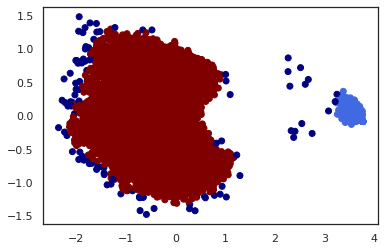

In [164]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

In [166]:
m = DBSCAN(eps=0.2, min_samples=10)
m.fit_predict(X)
clusters = m.labels_

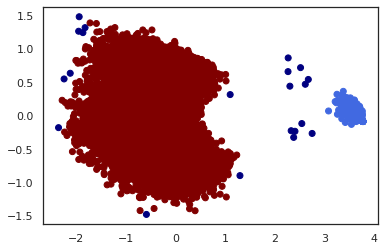

In [167]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

In [176]:
m = DBSCAN(eps=0.01, min_samples=5)
m.fit_predict(X)
clusters = m.labels_

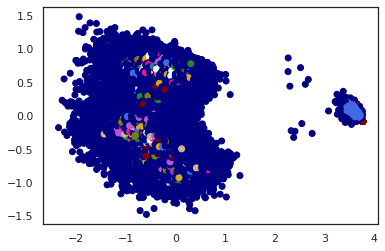

In [177]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

In [178]:
m = DBSCAN(eps=5, min_samples=5)
m.fit_predict(X)
clusters = m.labels_


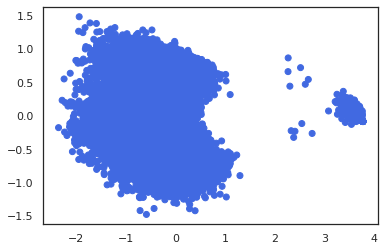

In [179]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

***Optimal min_samples***
* Generally, MinPts should be greater than or equal to the dimensionality of the data set
* For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
* If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

***Find an Optimal Epsilon***
* find an optimal epsilon by calculating the distance to the nearest n points for each point, sorting and plotting the results.

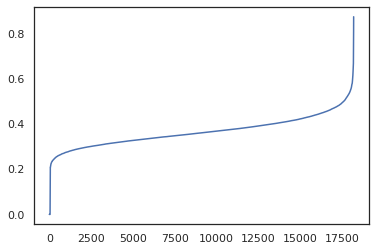

In [183]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_norm)
distances, indices = nbrs.kneighbors(X_norm)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Looks like the curvature starts picking up at around eps = 0.6

From this graph we can conclude the optimal value of eps to be 0.6



**Runnig DBscan on eps=0.6 and min_samples=4**

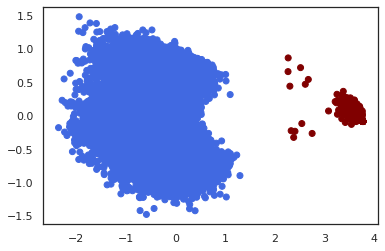

In [181]:
m = DBSCAN(eps=0.6, min_samples=4)
m.fit_predict(X)
clusters = m.labels_

colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

*** Cluster Analysis ***

In [247]:
model = DBSCAN(eps=0.3,min_samples=4)
cluster = model.fit_predict(reduced)

In [248]:

reduced['cluster'] = cluster
reduced['name'] = PlayersName
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced

x         y  cluster               name
0  -1.242042 -1.422392        0           L. Messi
1  -1.211741 -1.091635        0  Cristiano Ronaldo
2  -1.093046 -1.235086        0          Neymar Jr
3   4.610167 -0.313244        1             De Gea
4  -1.437608 -0.197945        0       K. De Bruyne
5  -1.128879 -1.076012        0          E. Hazard
6  -1.442653  0.065410        0          L. Modrić
7  -1.151156 -0.491210        0          L. Suárez
8  -0.979267  1.152054        0       Sergio Ramos
9   4.824624 -0.171945        1           J. Oblak
10 -0.945341 -0.637699        0     R. Lewandowski
11 -1.294591  0.317147        0           T. Kroos
12 -0.298818  1.587498       -1           D. Godín
13 -1.087597 -0.525282        0        David Silva
14 -1.140990  0.928781        0           N. Kanté
15 -0.962897 -1.170995        0          P. Dybala
16 -1.007323 -0.394613        0            H. Kane
17 -1.205949 -0.507743        0       A. Griezmann
18  4.837678 -0.036826        1      M. ter Stegen
19  4.789626 -0.166993        1        T. Courtois
20 -0.938365  1.130019        0    Sergio Busquets
21 -0.938129 -0.225865        0          E. Cavani
22  4.627052 -0.164841        1           M. Neuer
23 -0.831858 -1.103549        0          S. Agüero
24 -0.008370  1.762215       -1       G. Chiellini
25 -1.014483 -0.807556        0          K. Mbappé
26 -1.058957 -0.568827        0           M. Salah
27 -0.886864  1.224599        0           Casemiro
28 -1.054542 -0.394072        0       J. Rodríguez
29 -0.798451 -1.034161        0         L. Insigne
30 -1.064445 -0.098474        0               Isco
31 -1.128844 -0.479777        0         C. Eriksen
32 -1.159330 -0.442210        0           Coutinho
33 -0.771988 -0.693274        0      P. Aubameyang
34 -0.735043  1.301789        0         M. Hummels
35 -1.476965  0.649229        0            Marcelo
36 -1.298660 -0.167979        0            G. Bale
37  4.714016 -0.144602        1          H. Lloris
38 -0.523584 -0.789966        0         G. Higuaín
39 -0.667761  1.279106        0       Thiago Silva
40  4.867877 -0.016423        1      S. Handanovič
41  4.749915 -0.086170        1          G. Buffon
42 -0.758274  1.185551        0          S. Umtiti
43 -0.370979 -0.636123       -1          M. Icardi
44  0.480796  2.020346       -1       K. Koulibaly
45 -1.361988  0.376411        0           P. Pogba
46  4.764894 -0.109219        1           K. Navas
47 -0.611098 -0.424294       -1          R. Lukaku
48 -0.593548 -0.416828       -1        C. Immobile
49 -1.181793  0.635413        0         Jordi Alba
50 -0.850182 -0.885968        0         D. Mertens
51 -0.720078  1.328648        0      J. Vertonghen
52 -1.227982  0.316590        0          M. Hamšík
53 -1.193233  0.411204        0         I. Rakitić
54 -0.410955  1.457784       -1              Piqué

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


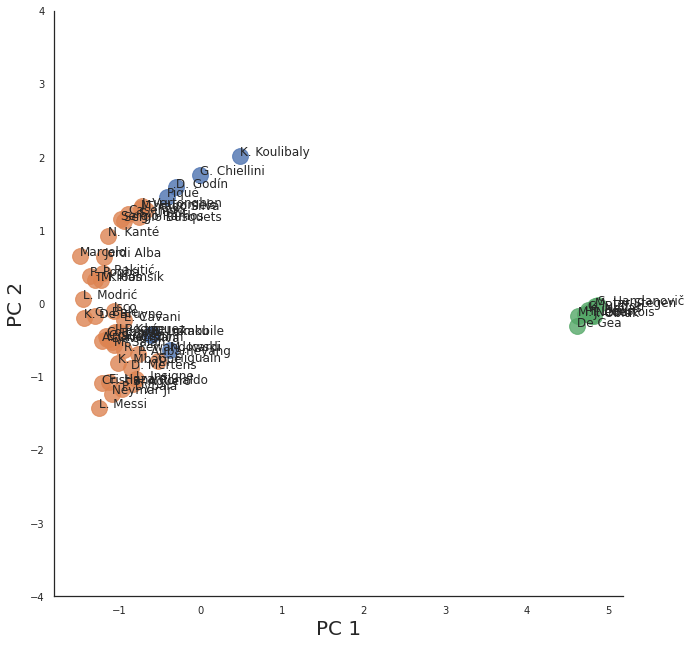

In [249]:

sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,fit_reg=False, size = 9, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-4, 4))
plt.tick_params(labelsize=10)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)
plt.show()

By the name of the points, We can tell that clusters are divided into Goalkeeper(green), Forward/midfielders(orange) and defenders(blue)